In [1]:
import numpy as np
import pandas as pd
import pennylane as qml
from qutip import Qobj, concurrence, ptrace
import matplotlib.pyplot as plt

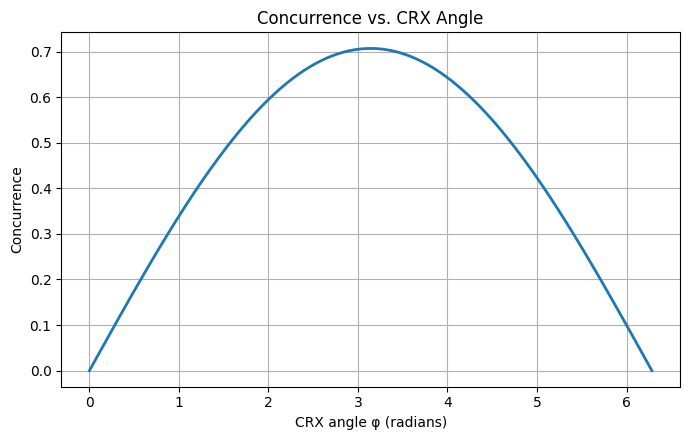

In [13]:
import pennylane as qml
from pennylane import numpy as np
from qutip import concurrence, Qobj
import matplotlib.pyplot as plt

# Use a 2-qubit device with statevector access
dev = qml.device("default.qubit", wires=2)

# Define the ansatz with CRX
def ansatz(theta, phi):
    qml.RY(theta, wires=0)
    qml.CRX(phi, wires=[0, 1])

# QNode to get the statevector
@qml.qnode(dev)
def state_qnode(theta, phi):
    ansatz(theta, phi)
    return qml.state()

# Sweep CRX angle φ
phi_vals = np.linspace(0, 2 * np.pi, 200)
theta = np.pi / 4  # fixed nontrivial input

concurrence_vals = []

for phi in phi_vals:
    state = state_qnode(theta, phi)

    # Compute concurrence via QuTiP
    rho = qml.math.outer(state, qml.math.conj(state))
    rho_qutip = Qobj(qml.math.toarray(rho), dims=[[2, 2], [2, 2]])
    conc = concurrence(rho_qutip)

    concurrence_vals.append(conc)

# Plot
plt.figure(figsize=(7, 4.5))
plt.plot(phi_vals, concurrence_vals, lw=2)
plt.xlabel("CRX angle φ (radians)")
plt.ylabel("Concurrence")
plt.title("Concurrence vs. CRX Angle")
plt.grid(True)
plt.tight_layout()
plt.show()
